In [7]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

Above we must include some installs that allows us to continue. SKLearn, numpy, and Pandas will be used for algorithms and data visualization. Matplotlib and scipy will let us visualize and read in the data.

In [8]:
Kol=loadmat('Kol_Label.mat')
KE = Kol['KE']
w_raw = Kol['w']
state = Kol['state']

Load in the data and separate each of the attributes.


Below the first "frame" of W is extracted and graphed. Based on previously known data, we also know that the 49th frame is considered to be anomalous. Here we take a look at the two frames side by side. As we can see, the anomalous W frame has a slightly higher amplitude and more stretched shape.

49


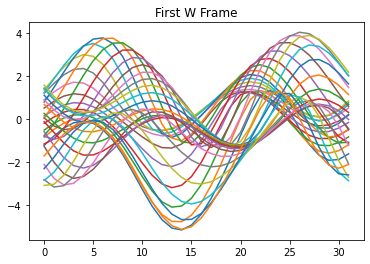

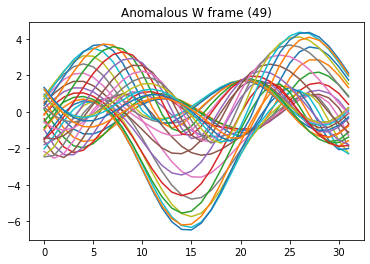

In [9]:
index = list(state[0]).index(1)
print(index)
plt.plot(w_raw[0])
plt.title("First W Frame")
plt.show()
plt.plot(w_raw[49])
plt.title("Anomalous W frame (49)")
plt.show()

(300, 1024)


Text(0, 0.5, 'Class')

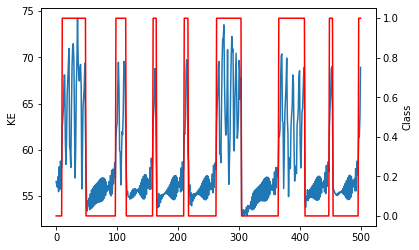

In [5]:
state=Kol['state'].squeeze()
state=state[1:]
[M,N1,N2]=w_raw.shape
w=w_raw.reshape(M,-1)
w=w[1:]
w_test = w[0:300,]
print(w_test.shape)
fix,ax=plt.subplots()
ax.plot(np.linalg.norm(w[500:1000,:],axis=1))
ax.set_ylabel('KE')
ax2=ax.twinx()
ax2.plot(state[500:1000],'r-')
ax2.set_ylabel('Class')

Above we reshape the W data and the states. We apply a norm to the W data to plot versus the Kinetic energy. This is the sponsor provided visual analysis of the data. It wis determined visually at first as to what the anomalous states would be, KE being over 60. This leads to the manual identification of anomalous class.

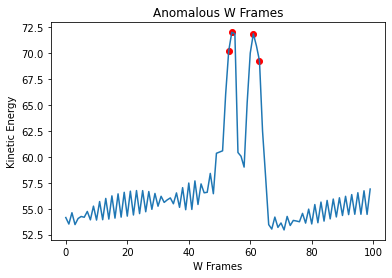

In [6]:
model = svm.OneClassSVM(kernel = 'rbf', nu=0.05).fit(w_test)
y_pred = model.predict(w_test)

y_pred[49]
good = y_pred[y_pred==1]
bad = y_pred[y_pred==-1]
indexes = []
KE_vals = []
for i in range(0, 100):
    if y_pred[i] == -1:
        indexes.append(i)
        KE_vals.append(Kol['KE'][0][i])
KE[0]
plt.plot(KE[0][0:100])
plt.scatter(indexes, KE_vals, color="Red")
plt.xlabel("W Frames")
plt.ylabel("Kinetic Energy")
plt.title("Anomalous W Frames")
plt.show()

In [ ]:
Next we will use a One Class Support Vector Machine classifier to attempt to classify the data as anomalous. Only the W frame data will be used in the classifier. Kinetic energy can be used to plot the data and analyze. The above graph shows this plot of each W frame and its corresponding Kinetic energy in blue, with red dots showing W frames being classified as anomalous. 